<h3>COMPUTAÇÃO QUÂNTICA</h3>
<hr>
<h4>Classificação de Dados Estruturados</h4>

<h5>Importação das Classes e Instanciação dos Objetos</h5>

In [2]:
# importação das classes que serão instanciadas como objeto
from Neuraline.QuantumPhysics.quantum_computing import QUANTUM_COMPUTER # classe de acesso ao computador quântico
from Neuraline.QuantumPhysics.quantum_computing import QuantumCircuit # classe para construção do circuito quântico
from Neuraline.Utilities.data import DataTable, DataExploration # classes para leitura e exploração de dados
from Neuraline.Utilities.chart import Chart # classe para plotagem de dados gráficos
data_table, data_exploration, chart = DataTable(), DataExploration(), Chart() # instanciação dos objetos das classes

<h5>Exibição dos Dados no Formato JSON</h5>

In [3]:
# código para visualização dos dados de classificação de flores com o iris-dataset
url_data = './data/iris.json' # endereço local do arquivo de dados
# sepalLength: altura da sépala da flor
# sepalWidth: largura da sépala da flor
# petalLength: altura da pétala da flor
# petalWidth: largura da pétala da flor
# species: nome da espécie da flor
data_table.visualization_json_inline( # visualização dos dados em estrutura tabular
    url_path=url_data, # atribuição do endereço do arquivo de dados
    limit=10 # limite de registros a serem exibidos para não poluir a tela
)
# código para exploração dos dados
output_types = data_exploration.getOutputTypesJSON( # captura dos valores únicos de uma coluna
    url_path=url_data, # atribuição do endereço do arquivo de dados
    output_column='species' # título da coluna que terá seus valores retornados sem repetição
)
print(f'Classificações possíveis: {sorted(output_types)}') # tipos de saída possíveis

╒═══════════════╤══════════════╤═══════════════╤══════════════╤═══════════╕
│   sepalLength │   sepalWidth │   petalLength │   petalWidth │ species   │
╞═══════════════╪══════════════╪═══════════════╪══════════════╪═══════════╡
│           5.1 │          3.5 │           1.4 │          0.2 │ setosa    │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           4.9 │          3   │           1.4 │          0.2 │ setosa    │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           4.7 │          3.2 │           1.3 │          0.2 │ setosa    │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           4.6 │          3.1 │           1.5 │          0.2 │ setosa    │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           5   │          3.6 │           1.4 │          0.2 │ setosa    │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           

<h5>Separação dos Dados em Treinamento e Teste</h5>

In [4]:
# separa um percentual dos dados para teste e outro para treinamento
titles = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'species'] # títulos das colunas a serem lidas
x_training, y_training, x_test, y_test = data_exploration.dataSeparationJSON( # separação dos dados em listas
    url_path=url_data, # atribuição do endereço do arquivo de dados
    list_inputs=titles[:-1], # títulos das colunas de entrada; da primeira a penúltima coluna
    list_outputs=titles[-1:], # títulos das colunas de saída; somente a última coluna
    training_percentage=.5, # 50% dos dados para treinamento
    test_percentage=.5 # 50% dos dados para teste
)

<h5>Construção do Circuito Quântico</h5>

In [6]:
quantum_circuit = QuantumCircuit( # instanciação do objeto do circuito
    architecture=QUANTUM_COMPUTER # arquitetura de acesso remoto ao computador quântico real
)
quantum_circuit.setQubits(nqubits=5) # seta 5 qubits (bits quânticos) na construção do circuito
# código de treinamento do circuito quântico
for x in x_training: quantum_circuit.addInputData(data=x) # atribuição das amostras de entrada
for y in y_training: quantum_circuit.addOutputData(data=y) # atribuição das amostras de saída
# código de inserção dos barramentos quânticos
result1 = quantum_circuit.addEncoderBarrierX() # barramento para conversão de dados clássicos em quânticos
result2 = quantum_circuit.addDecoderBarrierY() # barramento para conversão de dados quânticos em clássicos
if result1 and result2: print('Circuito quântico construído com sucesso.') # mensagem de sucesso
else: print('Erro na construção do circuito quântico.') # mensagem de fracasso

Circuito quântico construído com sucesso.


<h5>Exibição do Circuito Quântico Montado</h5>

In [7]:
result = quantum_circuit.showCircuit() # exibição do circuito quântico
if result: print('Engenharia quântica gravada com sucesso.') # mensagem de sucesso
else: print('Erro na gravação da engenharia quântica.') # mensagem de fracasso

|Q0>: ───────|X>───|Y>───
             │     │
|Q1>: ───────|X>───|Y>───
             │     │
|Q2>: ───────|X>───|Y>───
             │     │
|Q3>: ───────|X>───|Y>───
             │     │
|Q4>: ───────|X>───|Y>───
Engenharia quântica gravada com sucesso.


<h5>Medição e Conversão do Resultado</h5>

In [8]:
predicted = [] # inicialização da lista de resultados clássicos
for x in x_test: # loop para capturar os dados de teste um a um
    quantum_circuit.measurement( # medição do estado quântico
        repetitions=1024, # número referente a quantidade de medidas
        data=x # atribuição da entrada da medição
    )
    predicted.append( # alimentação da lista de resultados clássicos
        quantum_circuit.getResult() # captura dos resultados quânticos convertidos em clássicos
    )

<h5>Exibição do Resultado Probabilístico</h5>

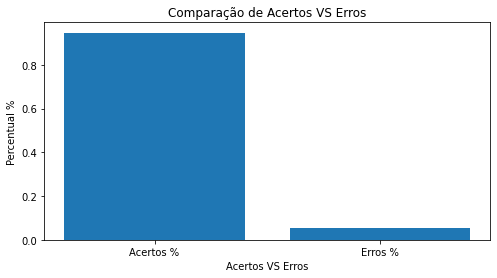

Nível de acerto: 0.9466666666666667 - Nível de erro: 0.05333333333333334


In [9]:
hits, errors = 0, 0 # inicialização das variáveis de contagem para acertos e erros
for y1, y2 in zip(predicted, y_test): # loop para percorrer a lista de resultados preditos e esperados
    if y1 == y2: hits += 1 # se a predição for igual ao resultado esperado então soma 1 nos acertos
    else: errors += 1 # se a predição for diferente do resultado esperado então soma 1 nos erros
hits, errors = hits/(hits+errors), errors/(hits+errors) # divide os valores pelo total para converter em porcentagem
chart.plotBAR( # plotagem do gráfico (de barras) probabilístico
    x=['Acertos %', 'Erros %'], # valores do eixo x (horizontal)
    y=[hits, errors], # valores do eixo y (vertical)
    x_label='Acertos VS Erros', # descrição do eixo x (horizontal)
    y_label='Percentual %', # descrição do eixo y (vertical)
    title='Comparação de Acertos VS Erros' # descrição/título do gráfico
)
print(f'Nível de acerto: {hits} - Nível de erro: {errors}') # exibição dos resultados probabilísticos

<hr>

<h5>Exemplo de Salvamento da Arquitetura do Circuito Quântico</h5>

In [10]:
result = quantum_circuit.saveCircuit( # salva o modelo para ser usado futuramente
    url_path='modelo_iris' # endereço e nome do arquivo a ser salvo com o modelo
) # será gerado um arquivo com a extensão .quantum
if result: print('Modelo quântico salvo com sucesso.') # mensagem de sucesso
else: print('Erro ao salvar o modelo quântico.') # mensagem de fracasso

Modelo quântico salvo com sucesso.


<hr>

<h5>Exemplo de Carregamento de uma Arquitetura Quântica Preexistente</h5>

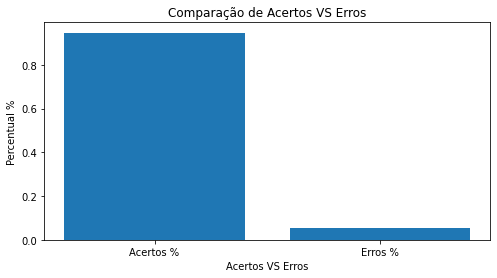

Nível de acerto: 0.9466666666666667 - Nível de erro: 0.05333333333333334


In [12]:
# MEDIÇÃO E CONVERSÃO DO RESULTADO
quantum_circuit = QuantumCircuit() # instanciação do objeto do circuito
# com um modelo já pré-treinado não há mais a necessidade de montar e treinar o circuito
'''
Para usar modelos pré-treinados em outras máquinas ou locais
a pasta Neuraline deverá constar no diretório do código de carregamento.
Não é necessário instalar o Neuraline para usar modelos pré-treinados
mas será necessário ter o Python 3.10 e as dependências previamente instaladas na máquina local.
'''
quantum_circuit.loadCircuit('modelo_iris') # carregamento do modelo salvo anteriormente no diretório local
predicted = [] # inicialização da lista de resultados clássicos
for x in x_test: # loop para capturar os dados de teste um a um
    quantum_circuit.measurement( # medição do estado quântico
        repetitions=1024, # número referente a quantidade de medidas
        data=x # atribuição da entrada da medição
    )
    predicted.append( # alimentação da lista de resultados clássicos
        quantum_circuit.getResult() # captura dos resultados quânticos convertidos em clássicos
    )
# EXIBIÇÃO DO RESULTADO PROBABILÍSTICO
hits, errors = 0, 0 # inicialização das variáveis de contagem para acertos e erros
for y1, y2 in zip(predicted, y_test): # loop para percorrer a lista de resultados preditos e esperados
    if y1 == y2: hits += 1 # se a predição for igual ao resultado esperado então soma 1 nos acertos
    else: errors += 1 # se a predição for diferente do resultado esperado então soma 1 nos erros
hits, errors = hits/(hits+errors), errors/(hits+errors) # divide os valores pelo total para converter em porcentagem
chart.plotBAR( # plotagem do gráfico (de barras) probabilístico
    x=['Acertos %', 'Erros %'], # valores do eixo x (horizontal)
    y=[hits, errors], # valores do eixo y (vertical)
    x_label='Acertos VS Erros', # descrição do eixo x (horizontal)
    y_label='Percentual %', # descrição do eixo y (vertical)
    title='Comparação de Acertos VS Erros' # descrição/título do gráfico
)
print(f'Nível de acerto: {hits} - Nível de erro: {errors}') # exibição dos resultados probabilísticos